<a href="https://colab.research.google.com/github/AsfiyaFirdouse/Deep-Learning/blob/main/CNN_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import numpy as np

In [ ]:
model= Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set= train_datagen.flow_from_directory("/content/drive/MyDrive/covid_data_updated/Train", target_size=(64, 64), batch_size=8, class_mode='binary')
test_set= test_datagen.flow_from_directory("/content/drive/MyDrive/covid_data_updated/test", target_size=(64, 64), batch_size=8, class_mode='binary')

Found 238 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
model.fit(training_set, steps_per_epoch=20, epochs=25)#batch_size is nothing but steps_per_epoch


Epoch 1/25
20/20 [==============================] - 4s 109ms/step - loss: 0.6929 - accuracy: 0.5443
Epoch 2/25
20/20 [==============================] - 3s 139ms/step - loss: 0.6918 - accuracy: 0.5562
Epoch 3/25
20/20 [==============================] - 3s 157ms/step - loss: 0.6926 - accuracy: 0.5253
Epoch 4/25
20/20 [==============================] - 2s 104ms/step - loss: 0.6918 - accuracy: 0.5375
Epoch 5/25
20/20 [==============================] - 2s 108ms/step - loss: 0.6912 - accuracy: 0.5500
Epoch 6/25
20/20 [==============================] - 2s 107ms/step - loss: 0.6898 - accuracy: 0.5823
Epoch 7/25
20/20 [==============================] - 2s 109ms/step - loss: 0.6919 - accuracy: 0.5375
Epoch 8/25
20/20 [==============================] - 3s 136ms/step - loss: 0.6910 - accuracy: 0.5443
Epoch 9/25
20/20 [==============================] - 2s 117ms/step - loss: 0.6918 - accuracy: 0.5253
Epoch 10/25
20/20 [==============================] - 2s 111ms/step - loss: 0.6906 - accuracy: 0.5437

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print("\n\n")
print('Test Loss:\t', test_loss,'\n')
print('Test accuracy:\t', test_acc,'\n')

5/5 - 1s - loss: 0.6807 - accuracy: 0.7692 - 624ms/epoch - 125ms/step



Test Loss:	 0.680709958076477 

Test accuracy:	 0.7692307829856873 



In [ ]:
import tensorflow as tf

In [ ]:
resnet_model=Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(64,64,3),pooling='avg', classes=2)
#not going to train the model layers which is already trained
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(56, activation='relu'))
resnet_model.add(Dense(156, activation='relu'))
resnet_model.add(Dense(32, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))
resnet_model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
resnet_model.fit(training_set, steps_per_epoch=20, epochs=20)

Epoch 1/20
20/20 [==============================] - 10s 170ms/step - loss: 0.6964 - accuracy: 0.2152
Epoch 2/20
20/20 [==============================] - 6s 283ms/step - loss: 0.6965 - accuracy: 0.2188
Epoch 3/20
20/20 [==============================] - 4s 175ms/step - loss: 0.6957 - accuracy: 0.2722
Epoch 4/20
20/20 [==============================] - 4s 171ms/step - loss: 0.6957 - accuracy: 0.2562
Epoch 5/20
20/20 [==============================] - 5s 251ms/step - loss: 0.6960 - accuracy: 0.2722
Epoch 6/20
20/20 [==============================] - 4s 170ms/step - loss: 0.6957 - accuracy: 0.2722
Epoch 7/20
20/20 [==============================] - 4s 170ms/step - loss: 0.6951 - accuracy: 0.2975
Epoch 8/20
20/20 [==============================] - 6s 284ms/step - loss: 0.6954 - accuracy: 0.2911
Epoch 9/20
20/20 [==============================] - 4s 170ms/step - loss: 0.6956 - accuracy: 0.2848
Epoch 10/20
20/20 [==============================] - 6s 286ms/step - loss: 0.6951 - accuracy: 0.343

In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_set, verbose=2)
print("\n\n")
print('Test Loss:\t', test_loss,'\n')
print('Test accuracy:\t', test_acc,'\n')

5/5 - 3s - loss: 0.6867 - accuracy: 0.7436 - 3s/epoch - 561ms/step



Test Loss:	 0.6866593956947327 

Test accuracy:	 0.7435897588729858 



In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model=Sequential()
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dense(1, activation='sigmoid'))
vgg_model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
vgg_model.fit(training_set, steps_per_epoch=20, epochs=20)

Epoch 1/20
20/20 [==============================] - 10s 412ms/step - loss: 0.9301 - accuracy: 0.4810
Epoch 2/20
20/20 [==============================] - 10s 480ms/step - loss: 0.9723 - accuracy: 0.4430
Epoch 3/20
20/20 [==============================] - 9s 434ms/step - loss: 0.9574 - accuracy: 0.4375
Epoch 4/20
20/20 [==============================] - 9s 411ms/step - loss: 0.9036 - accuracy: 0.4747
Epoch 5/20
20/20 [==============================] - 10s 487ms/step - loss: 0.9065 - accuracy: 0.4563
Epoch 6/20
20/20 [==============================] - 7s 357ms/step - loss: 0.8981 - accuracy: 0.4430
Epoch 7/20
20/20 [==============================] - 9s 434ms/step - loss: 0.8834 - accuracy: 0.4430
Epoch 8/20
20/20 [==============================] - 9s 468ms/step - loss: 0.8331 - accuracy: 0.4750
Epoch 9/20
20/20 [==============================] - 7s 356ms/step - loss: 0.8123 - accuracy: 0.4810
Epoch 10/20
20/20 [==============================] - 9s 435ms/step - loss: 0.8067 - accuracy: 0.4

In [ ]:
test_loss, test_acc = vgg_model.evaluate(test_set, verbose=2)
print("\n\n")
print('Test Loss:\t', test_loss,'\n')
print('Test accuracy:\t', test_acc,'\n')

5/5 - 2s - loss: 1.0424 - accuracy: 0.2308 - 2s/epoch - 417ms/step



Test Loss:	 1.0423916578292847 

Test accuracy:	 0.23076923191547394 



In [ ]:
!pip install lime
import lime
from lime import lime_image

In [ ]:
tmp1, tmp2= test_set.next()
print(tmp1.shape)#stores full info
print(tmp2.shape)#stores no of images

(8, 64, 64, 3)
(8,)


In [ ]:
!pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
background= shap.utils.sample(tmp1, 5)
explainer=shap.DeepExplainer(model, background)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
sample_index=np.random.randint(0, background.shape[0])
sample_image=background[sample_index]

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), model.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


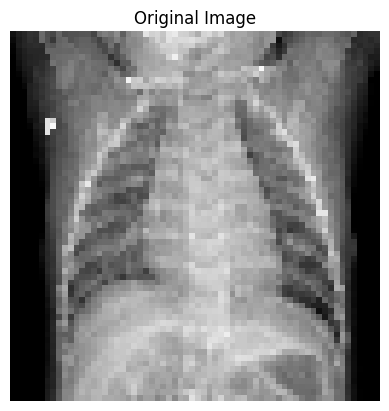

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

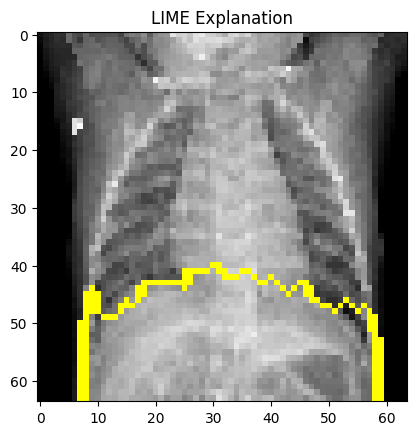

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()

In [ ]:
sample_image_batch = np.expand_dims(sample_image, axis=0)  # Add batch dimension
shap_values = explainer.shap_values(sample_image_batch)
sampled_images_array_scaled = sample_image_batch * 255
sampled_images_array_scaled = sampled_images_array_scaled.astype(np.uint8)

shap.image_plot(shap_values,sampled_images_array_scaled)
print(sampled_images_array_scaled.shape)
print(np.min(shap_values))
print(np.max(shap_values))

AttributeError: 'LimeImageExplainer' object has no attribute 'shap_values'